<a href="https://colab.research.google.com/github/claudiaesnarrizaga/APRENDIZAJE_AUTOMATICO_23_24/blob/main/PRUEBAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)#

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.14.0


In [103]:
# CARGAMOS EL CONJUNTO DE DATOS CIFAR-100 EN KERAS
from keras.datasets import  cifar100   # De todos los conjuntos de datos impórtame mnist
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data() # Llama a una función, cargar datos

In [104]:
# Obtener información sobre el conjunto de entrenamiento
print("Shape del conjunto de entrenamiento (imágenes):", train_images.shape)
print("Shape del conjunto de entrenamiento (etiquetas):", train_labels.shape)
print("Número de clases en CIFAR-100:", len(set(train_labels.flatten())))

# Obtener información sobre el conjunto de prueba
print("Shape del conjunto de prueba (imágenes):", test_images.shape)
print("Shape del conjunto de prueba (etiquetas):", test_labels.shape)

Shape del conjunto de entrenamiento (imágenes): (50000, 32, 32, 3)
Shape del conjunto de entrenamiento (etiquetas): (50000, 1)
Número de clases en CIFAR-100: 100
Shape del conjunto de prueba (imágenes): (10000, 32, 32, 3)
Shape del conjunto de prueba (etiquetas): (10000, 1)


Para verificar que los datos se están cargando y preprocesando correctamente, así como para asegurarte de que las etiquetas estén en el formato correcto y que las imágenes no estén dañadas, puedes realizar las siguientes comprobaciones y acciones:

**1. Visualización de imágenes:**

Muestra algunas imágenes del conjunto de entrenamiento para asegurarte de que se están cargando correctamente y tienen la apariencia esperada.

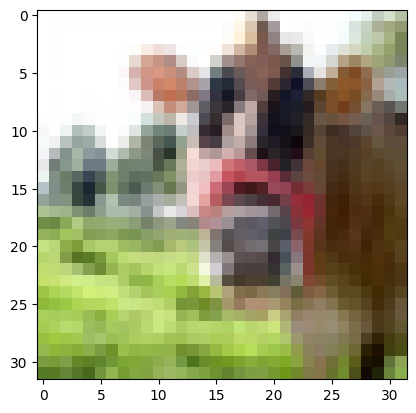

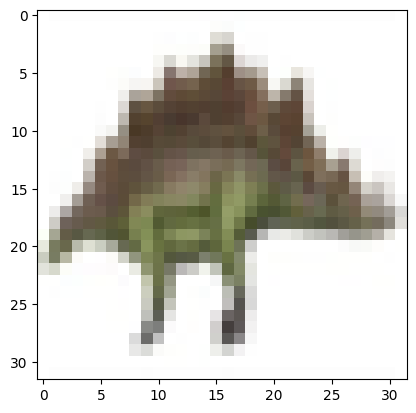

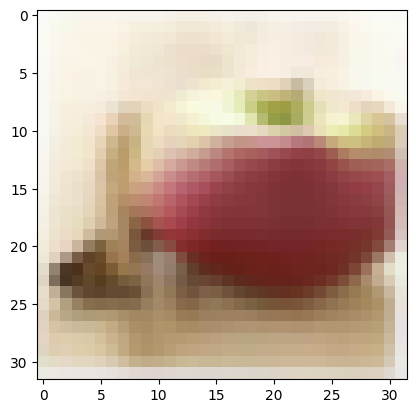

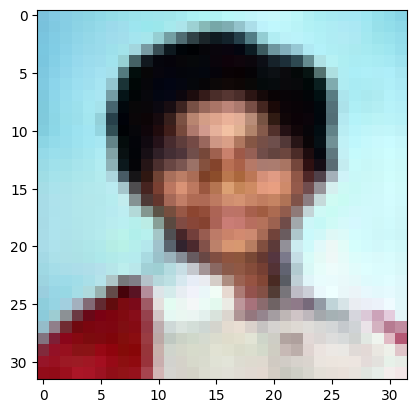

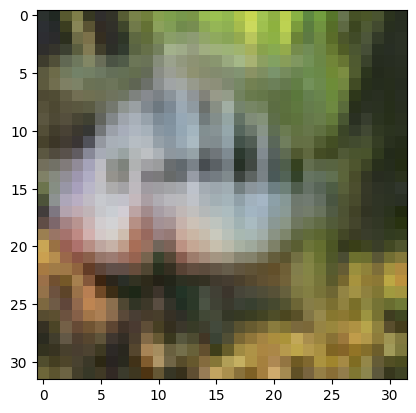

In [105]:
import matplotlib.pyplot as plt

# Muestra algunas imágenes del conjunto de entrenamiento
for i in range(5):
    plt.imshow(train_images[i])
    plt.show()

In [106]:
# Normalizar datos
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255
from keras.utils import to_categorical

# Supongamos que train_labels y test_labels son tus etiquetas originales

# Convertir las etiquetas de entrenamiento a one-hot encoding
train_labels_one_hot = to_categorical(train_labels, num_classes=100)

# Convertir las etiquetas de prueba a one-hot encoding
test_labels_one_hot = to_categorical(test_labels, num_classes=100)

**2. Etiquetas:**

Verifica las etiquetas para asegurarte de que estén en el formato correcto y representen las clases adecuadamente.

Muestra las primeras etiquetas del conjunto de entrenamiento y prueba para observar cómo están representadas.

In [107]:
# Muestra algunas etiquetas del conjunto de entrenamiento y prueba
print("Etiquetas de entrenamiento:", train_labels[:10])
print("Etiquetas de prueba:", test_labels[:10])

Etiquetas de entrenamiento: [[19]
 [29]
 [ 0]
 [11]
 [ 1]
 [86]
 [90]
 [28]
 [23]
 [31]]
Etiquetas de prueba: [[49]
 [33]
 [72]
 [51]
 [71]
 [92]
 [15]
 [14]
 [23]
 [ 0]]


Las etiquetas que estás mostrando parecen ser codificadas como números enteros, no en el formato de one-hot encoding. En este formato, cada número entero representa la clase a la que pertenece la imagen.

Por ejemplo, en las etiquetas de entrenamiento, la primera imagen pertenece a la clase 19, la segunda a la clase 29, y así sucesivamente. Lo mismo ocurre con las etiquetas de prueba.

In [108]:
# Verificar las etiquetas de entrenamiento y prueba
print("Etiquetas de entrenamiento (primeras 3):\n", train_labels_one_hot[:3])
print("Etiquetas de prueba (primeras 3):\n", test_labels_one_hot[:3])

Etiquetas de entrenamiento (primeras 3):
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]]
Etiquetas de prueba (pri

Las etiquetas están en formato one-hot encoding porque estamos utilizando *to_categorical*. Cada etiqueta debería ser un vector de 100 elementos, con un 1 en la posición correspondiente a la clase y 0 en las demás posiciones.

**3. Estadísticas básicas:**

Verifica estadísticas básicas sobre los datos, como la forma de las matrices y el rango de los valores de píxeles.

In [109]:
# Verifica la forma de los conjuntos de entrenamiento y prueba
print("Train images shape:", train_images.shape)
print("Test images shape:", test_images.shape)

# Verifica el rango de valores de píxeles
print("Pixel value range:", train_images.min(), "to", train_images.max())

Train images shape: (50000, 32, 32, 3)
Test images shape: (10000, 32, 32, 3)
Pixel value range: 0.0 to 1.0


Asegúrate de que las imágenes tengan el formato correcto (por ejemplo, (32, 32, 3)) y que los valores de píxeles estén en el rango esperado (generalmente 0 a 1 después de la normalización).

**4. Consistencia de datos:**

Verifica que la cantidad de imágenes coincida con la cantidad de etiquetas tanto en el conjunto de entrenamiento como en el conjunto de prueba.

In [110]:
print("Number of training images:", len(train_images))
print("Number of training labels:", len(train_labels))
print("Number of testing images:", len(test_images))
print("Number of testing labels:", len(test_labels))

Number of training images: 50000
Number of training labels: 50000
Number of testing images: 10000
Number of testing labels: 10000


Asegúrate de que el número de imágenes y etiquetas coincida.

Estas verificaciones te ayudarán a identificar posibles problemas en la carga y preprocesamiento de los datos. Si encuentras alguna anomalía, podrías necesitar ajustar el proceso de carga de datos o el preprocesamiento para corregirlo.

Una vez que has preparado adecuadamente tus datos, puedes seguir los siguientes pasos para entrenar una red neuronal:

**1. Definir el modelo de la red:**

Utiliza la API de Keras para definir el modelo de tu red neuronal. Puedes agregar capas como convoluciones, max pooling, capas completamente conectadas, capas de dropout, etc., según la arquitectura que desees.

In [111]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='softmax'))

**2. Compilar el modelo:**

Configura el modelo para el entrenamiento, especificando la función de pérdida, el optimizador y las métricas que deseas monitorizar.

In [112]:
from tensorflow.keras.optimizers import Adam

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

**3. Entrenar el modelo:**

Utiliza el método fit para entrenar el modelo con tus datos de entrenamiento.

In [113]:
model.fit(train_images, train_labels_one_hot,
          batch_size=64,
          epochs=10,
          validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 52s 81ms/step - loss: 4.0536 - accuracy: 0.0830 - val_loss: 3.5278 - val_accuracy: 0.1720
Epoch 2/10
625/625 [==============================] - 48s 77ms/step - loss: 3.4702 - accuracy: 0.1735 - val_loss: 3.1674 - val_accuracy: 0.2340
Epoch 3/10
625/625 [==============================] - 49s 79ms/step - loss: 3.1871 - accuracy: 0.2228 - val_loss: 2.9330 - val_accuracy: 0.2770
Epoch 4/10
625/625 [==============================] - 49s 78ms/step - loss: 3.0041 - accuracy: 0.2600 - val_loss: 2.8170 - val_accuracy: 0.3024
Epoch 5/10
625/625 [==============================] - 48s 78ms/step - loss: 2.8615 - accuracy: 0.2864 - val_loss: 2.7275 - val_accuracy: 0.3194
Epoch 6/10
625/625 [==============================] - 50s 79ms/step - loss: 2.7433 - accuracy: 0.3072 - val_loss: 2.6445 - val_accuracy: 0.3403
Epoch 7/10
625/625 [==============================] - 49s 79ms/step - loss: 2.6456 - accuracy: 0.3246 - val_loss: 2.5825 - val_accuracy:

**4. Evaluar el rendimiento en el conjunto de prueba:**

Utiliza el método evaluate para evaluar el rendimiento del modelo en el conjunto de prueba.

In [114]:
test_loss, test_acc = model.evaluate(test_images, test_labels_one_hot)
print('Test accuracy:', test_acc)

313/313 [==============================] - 3s 10ms/step - loss: 2.4748 - accuracy: 0.3743
Test accuracy: 0.3743000030517578
